In [1]:
#Importation
import pickle
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn as sk
from sklearn import tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from textblob import TextBlob
from statistics import mean
from math import ceil
from collections import Counter
warnings.filterwarnings('ignore')



In [2]:
# On ramene les données du prétraitement du dataframe
df = pd.read_pickle("../PICKLE/df_score.pkl")
df

,No DESIGNATION,Reussite,COMMENTAIRES,score_reussite,score_echec
0,299568158,False,[ obtenu marchand christophe le a le clien...,1.2610,2.2470
1,297892193,True,[ point de terminaison optique existante malf...,17.1175,6.5856
2,297897767,True,[ point de terminaison optique non existante ...,27.8597,13.1611
3,223370510,True,[ point de terminaison optique non existante ...,11.6306,2.7709
4,299556603,True,[ point de terminaison optique existante malf...,8.4132,2.7430
...,...,...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...,11.4731,6.5099
4184,296611510,True,[ point de terminaison optique existante malf...,13.7052,3.3924
4185,223309738,True,[ point de terminaison optique non existante ...,8.0738,2.7191
4186,298170718,True,[ point de terminaison optique non existante ...,10.4827,3.8685


# 4 - Statistiques sur les commentaires du dataframe ETI31
Le but est de créer un dataframe contenant les statistiques sur les commentaires de ETI31 pour plus tard les utiliser pour faire un modele de Machine Learning. Nous allons également créer 2 dataframes pour visualiser séparement les échecs et les réussites.

In [3]:
#Proportion de réussite et d'échecs
def proportions():
    count_reussite = df["Reussite"].value_counts(normalize=True)*100
    # Création d'un histogramme des pourcentages
    count_reussite.plot(kind='bar')

    # Ajout d'un titre et d'étiquettes d'axe
    plt.title('Histogramme des pourcentages par valeur')
    plt.xlabel('Valeur')
    plt.ylabel('Pourcentage')

    # Affichage du graphique
    plt.show()
    print(count_reussite)

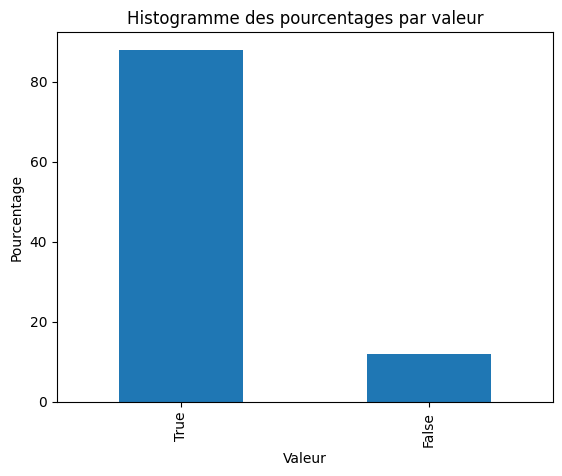

Reussite
True     88.013372
False    11.986628
Name: proportion, dtype: float64


In [4]:
proportions()

In [5]:
df_echec =  df[df["Reussite"]==False]
df_echec

,No DESIGNATION,Reussite,COMMENTAIRES,score_reussite,score_echec
0,299568158,False,[ obtenu marchand christophe le a le clien...,1.2610,2.2470
8,296415177,False,[obtenu pian claudine au le a : le clt d...,0.8337,1.8785
11,223449565,False,[cacouigpsdnpoint de de branchementg ?tage d...,13.8676,8.9663
12,296947056,False,[suite a plusieurs reles aucun retour de la pa...,3.8096,10.0957
23,296142912,False,"[pas de contact client pour fixer , , ]",0.0000,0.0000
...,...,...,...,...,...
4130,298937060,False,[ probleme d adresse bonne adresse le roz f...,2.0947,1.9124
4149,297452718,False,[cacouigpsdnpoint de de branchementgpoint de ...,5.7523,3.6734
4160,297897749,False,[ cli client dae na non eéligible au dae...,0.2659,1.0319
4161,299880324,False,[apres plusieurs reles pas de retour client do...,27.8142,18.1633


In [6]:
df_reussite =  df[df["Reussite"]==True]
df_reussite

,No DESIGNATION,Reussite,COMMENTAIRES,score_reussite,score_echec
1,297892193,True,[ point de terminaison optique existante malf...,17.1175,6.5856
2,297897767,True,[ point de terminaison optique non existante ...,27.8597,13.1611
3,223370510,True,[ point de terminaison optique non existante ...,11.6306,2.7709
4,299556603,True,[ point de terminaison optique existante malf...,8.4132,2.7430
5,299001768,True,[ point de terminaison optique non existante ...,9.8522,2.7450
...,...,...,...,...,...
4183,223275005,True,[merci de clrer le rendez vous du client car i...,11.4731,6.5099
4184,296611510,True,[ point de terminaison optique existante malf...,13.7052,3.3924
4185,223309738,True,[ point de terminaison optique non existante ...,8.0738,2.7191
4186,298170718,True,[ point de terminaison optique non existante ...,10.4827,3.8685


In [7]:
def nombres_de_commentaires(dataframe):
    ensemble = dataframe["COMMENTAIRES"]
    nombre_commentaires = []
    somme = 0
    for commentaires in ensemble:
        i = len(commentaires)
        somme = somme + i
        nombre_commentaires.append(i)
    moyenne = somme/len(ensemble)
    print("Le nombre moyen de commentaires est de " + str(moyenne)+".")
    return nombre_commentaires

In [8]:
def longueur_moyenne_commentaires(dataframe):
    ensemble = dataframe["COMMENTAIRES"]
    longueur_moyenne_commentaire = []
    somme_ensemble= 0
    
    for commentaires in ensemble:
        somme = 0
        for commentaire in commentaires:
            somme = somme + len(commentaire)
        
        moyenne_commentaires = somme/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_commentaires
        
        longueur_moyenne_commentaire.append(moyenne_commentaires)
    moyenne_ensemble = somme_ensemble/len(ensemble)
    print("La longueur moyenne des commentaires est de " + str(moyenne_ensemble) + ".")
    return longueur_moyenne_commentaire

In [9]:
df_echec["nombre_commentaires"] = nombres_de_commentaires(df_echec)
df_reussite["nombre_commentaires"]=nombres_de_commentaires(df_reussite)
df["nombre_commentaires"]=nombres_de_commentaires(df)

df_echec["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_echec)
df_reussite["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df_reussite)
df["Longueur moyenne commentaire"]=longueur_moyenne_commentaires(df)

Le nombre moyen de commentaires est de 5.386454183266932.
Le nombre moyen de commentaires est de 4.252306022788931.
Le nombre moyen de commentaires est de 4.388252148997134.
La longueur moyenne des commentaires est de 49.63006988584674.
La longueur moyenne des commentaires est de 57.01015289873821.
La longueur moyenne des commentaires est de 56.12552976777561.


In [10]:
def histogramme(dataframe,colonne,bins,titre):
    plt.hist(dataframe[colonne],bins=bins)
    plt.title(titre)
    plt.show()

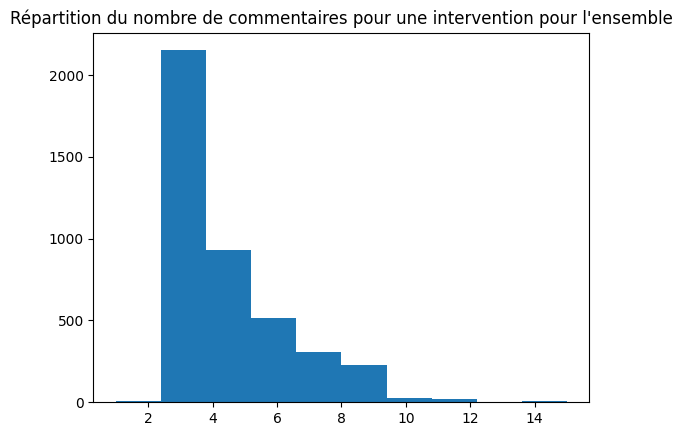

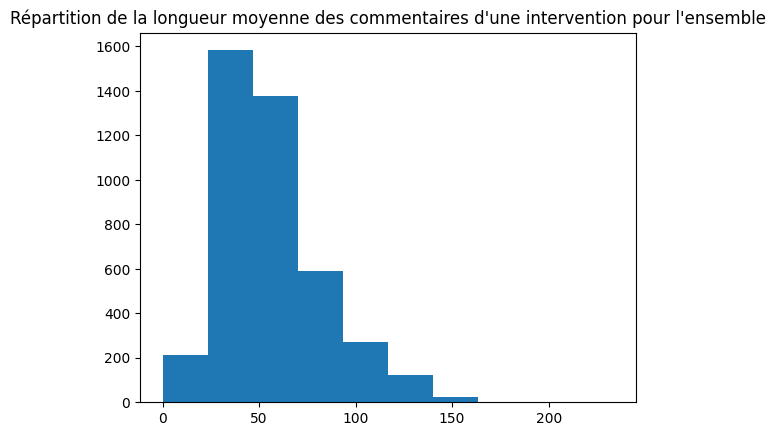

In [11]:
histogramme(df,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour l'ensemble")
histogramme(df,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour l'ensemble")

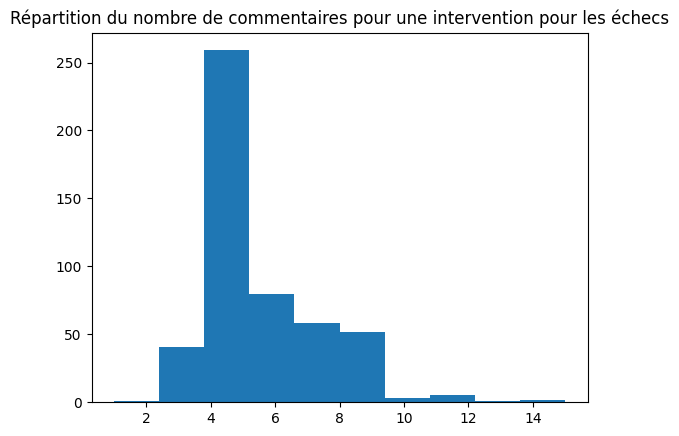

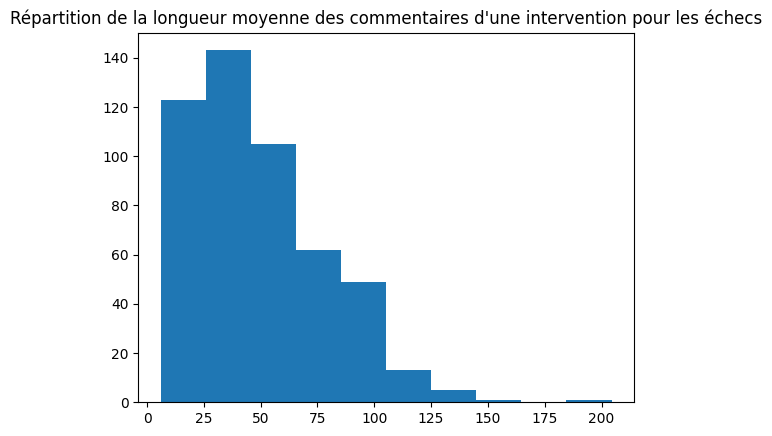

In [12]:
histogramme(df_echec,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour les échecs")
histogramme(df_echec,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour les échecs")

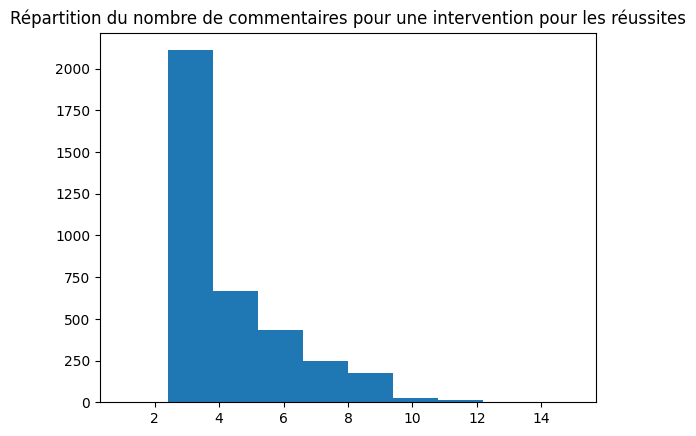

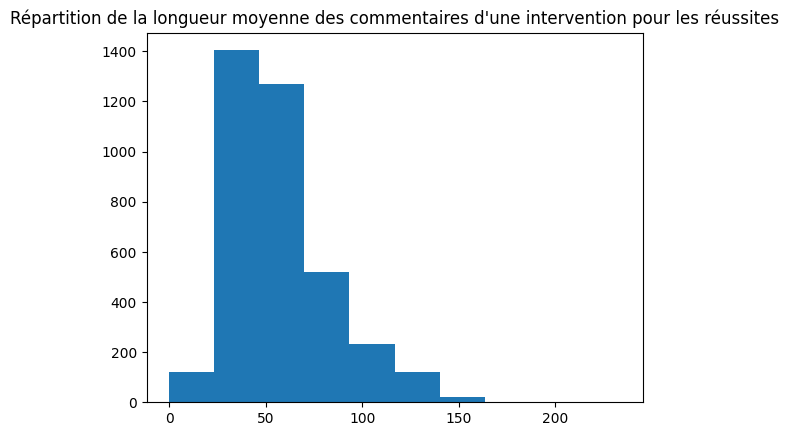

In [13]:
histogramme(df_reussite,"nombre_commentaires",10,"Répartition du nombre de commentaires pour une intervention pour les réussites")
histogramme(df_reussite,"Longueur moyenne commentaire",10,"Répartition de la longueur moyenne des commentaires d'une intervention pour les réussites")

# 5 - Normalisation

In [14]:
#Normalisation des données
def normalisationForAll(dataframe,exceptions):
    #On crée une copie du dataframe passe en argument
    nouveau_df = dataframe
    
    #On enleve les colonnes sans donnees numeriques
    df_a_normaliser = nouveau_df.drop(exceptions, axis=1)
    
    #On applique la normalisation standard
    scaler = StandardScaler()
    donnees_normalisees = scaler.fit_transform(df_a_normaliser)
    df_donnees_normalisees = pd.DataFrame(donnees_normalisees, columns=df_a_normaliser.columns)
    
    #On remplace dans le nouveau dataframe les anciennes colonnes par les colonnes avec les donnes normalisées
    for colonne in exceptions :
        df_donnees_normalisees[colonne] = nouveau_df[colonne]

    return df_donnees_normalisees

df = normalisationForAll(df,["No DESIGNATION","Reussite","COMMENTAIRES"]).dropna(axis=0)
df.dtypes

score_reussite                  float64
score_echec                     float64
nombre_commentaires             float64
Longueur moyenne commentaire    float64
No DESIGNATION                    int64
Reussite                           bool
COMMENTAIRES                     object
dtype: object

In [15]:
df

,score_reussite,score_echec,nombre_commentaires,Longueur moyenne commentaire,No DESIGNATION,Reussite,COMMENTAIRES
0,-1.380672,-0.890904,-0.755824,-0.328797,299568158,False,[ obtenu marchand christophe le a le clien...
1,0.438759,0.126984,0.333062,-0.468411,297892193,True,[ point de terminaison optique existante malf...
2,1.671356,1.669676,1.966390,1.752941,297897767,True,[ point de terminaison optique non existante ...
3,-0.190828,-0.767991,-0.755824,-0.627969,223370510,True,[ point de terminaison optique non existante ...
4,-0.560003,-0.774537,-0.755824,-0.877279,299556603,True,[ point de terminaison optique existante malf...
...,...,...,...,...,...,...,...
4183,-0.208900,0.109224,1.966390,-0.359961,223275005,True,[merci de clrer le rendez vous du client car i...
4184,0.047219,-0.622180,-0.755824,-0.665366,296611510,True,[ point de terminaison optique existante malf...
4185,-0.598947,-0.780144,-0.755824,-0.627969,223309738,True,[ point de terminaison optique non existante ...
4186,-0.322542,-0.510481,0.333062,-0.722707,298170718,True,[ point de terminaison optique non existante ...


# 6 - Polarité et subjectivité

In [16]:
def polarite_liste_commentaires(liste):
    liste_polarite = []
    somme_ensemble = 0
    for commentaires in liste:
        somme_polarite = 0
        for commentaire in commentaires:
            somme_polarite = somme_polarite + TextBlob(commentaire).polarity
        moyenne_polarite = somme_polarite/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_polarite
        liste_polarite.append(moyenne_polarite)
    moyenne = somme_ensemble/len(liste)
    print(moyenne)
    return liste_polarite

def subjectivite_liste_commentaires(liste):
    liste_subjectivite = []
    somme_ensemble = 0
    for commentaires in liste:
        somme_subjectivite = 0
        for commentaire in commentaires:
            somme_subjectivite = somme_subjectivite + TextBlob(commentaire).subjectivity
        moyenne_subjectivite = somme_subjectivite/len(commentaires)
        somme_ensemble = somme_ensemble + moyenne_subjectivite
        liste_subjectivite.append(moyenne_subjectivite)
    moyenne = somme_ensemble/len(liste)
    print(moyenne)
    return liste_subjectivite


In [17]:
df["polarite"]=polarite_liste_commentaires(df["COMMENTAIRES"])
df_reussite["polarite"]=polarite_liste_commentaires(df_reussite["COMMENTAIRES"])
df_echec["polarite"]=polarite_liste_commentaires(df_echec["COMMENTAIRES"])

df["subjectivite"]=subjectivite_liste_commentaires(df["COMMENTAIRES"])
df_reussite["subjectivite"]=subjectivite_liste_commentaires(df_reussite["COMMENTAIRES"])
df_echec["subjectivite"]=subjectivite_liste_commentaires(df_echec["COMMENTAIRES"])


df

0.10229517692498966
0.11644772913711957
-0.0016217701943548554
0.1324889376068211
0.144859781354528
0.04165441558681097


,score_reussite,score_echec,nombre_commentaires,Longueur moyenne commentaire,No DESIGNATION,Reussite,COMMENTAIRES,polarite,subjectivite
0,-1.380672,-0.890904,-0.755824,-0.328797,299568158,False,[ obtenu marchand christophe le a le clien...,0.000000,0.000000
1,0.438759,0.126984,0.333062,-0.468411,297892193,True,[ point de terminaison optique existante malf...,0.100000,0.100000
2,1.671356,1.669676,1.966390,1.752941,297897767,True,[ point de terminaison optique non existante ...,0.062500,0.062500
3,-0.190828,-0.767991,-0.755824,-0.627969,223370510,True,[ point de terminaison optique non existante ...,0.133333,0.158333
4,-0.560003,-0.774537,-0.755824,-0.877279,299556603,True,[ point de terminaison optique existante malf...,0.166667,0.166667
...,...,...,...,...,...,...,...,...,...
4183,-0.208900,0.109224,1.966390,-0.359961,223275005,True,[merci de clrer le rendez vous du client car i...,0.000000,0.000000
4184,0.047219,-0.622180,-0.755824,-0.665366,296611510,True,[ point de terminaison optique existante malf...,0.166667,0.166667
4185,-0.598947,-0.780144,-0.755824,-0.627969,223309738,True,[ point de terminaison optique non existante ...,0.166667,0.166667
4186,-0.322542,-0.510481,0.333062,-0.722707,298170718,True,[ point de terminaison optique non existante ...,0.100000,0.100000


In [18]:
#On ne va garder que les colonnes avec des valeurs numériques et la labélisation
df2 = df.drop(columns=["No DESIGNATION","COMMENTAIRES"])
df2["Reussite"]=df2["Reussite"].astype('bool')
df2

,score_reussite,score_echec,nombre_commentaires,Longueur moyenne commentaire,Reussite,polarite,subjectivite
0,-1.380672,-0.890904,-0.755824,-0.328797,False,0.000000,0.000000
1,0.438759,0.126984,0.333062,-0.468411,True,0.100000,0.100000
2,1.671356,1.669676,1.966390,1.752941,True,0.062500,0.062500
3,-0.190828,-0.767991,-0.755824,-0.627969,True,0.133333,0.158333
4,-0.560003,-0.774537,-0.755824,-0.877279,True,0.166667,0.166667
...,...,...,...,...,...,...,...
4183,-0.208900,0.109224,1.966390,-0.359961,True,0.000000,0.000000
4184,0.047219,-0.622180,-0.755824,-0.665366,True,0.166667,0.166667
4185,-0.598947,-0.780144,-0.755824,-0.627969,True,0.166667,0.166667
4186,-0.322542,-0.510481,0.333062,-0.722707,True,0.100000,0.100000


In [19]:
df2.to_pickle("../PICKLE/df_stat_commentaires.pkl")